In [3]:
import spacy

In [9]:
nlp = spacy.load('en_core_web_sm')        # 토크나이징할 객체 생성해서 nlp 변수에 할당
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural langnage processing frequently involve speech recognition, natural language understanding, and natural language generation."
doc = nlp(sentence)                       # 텍스트에 대한 구문 분석 객체 반환

In [10]:
word_tokenized_sentence = [token.text for token in doc]        # 단어 토크나이징
sentence_tokenized_list = [sent.text for sent in doc.sents]    # 문장 토크나이징
print(word_tokenized_sentence)
print(sentence_tokenized_list)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Challenges', 'in', 'natural', 'langnage', 'processing', 'frequently', 'involve', 'speech', 'recognition', ',', 'natural', 'language', 'understanding', ',', 'and', 'natural', 'language', 'generation', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural l

위에서는 단어를 기준으로 나누고 있고, 아래에서는 문장을 기준으로 나누고 있다.

# 한글 토크나이징 라이브러리

In [11]:
from konlpy.tag import Okt

In [12]:
okt = Okt()

In [13]:
text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ'

print(okt.morphs(text))
print(okt.morphs(text, stem=True))    # 형태소 단위로 나눈 후 '어간'을 추출

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


stem=True는 '어간'을 추출하기 때문에 '해야지'가 '하다'로 추출되었다.

In [14]:
print(okt.nouns(text))       # 명사 추출
print(okt.phrases(text))     # 어절 단위로 나뉘어서 추출

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [16]:
# 품사 태깅: pos(part of speech)
print(okt.pos(text))
print()
print(okt.pos(text, join=True))    # 형태소와 품사를 붙여서 리스트화

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]

['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


join=True 옵션을 통해 품사가 형태소와 붙어서 나오게 할 수 있다.

In [17]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill
# kolaw: 한국 법률 말뭉치. 'constitution.txt'파일로 저장되어 있음
# kobill: 대한민국 국회 의안 말뭉치, 각 id값을 가지는 의안으로 구성됨. 파일은 '1809890.txt'부터 '1809899.txt'까지

In [18]:
kolaw.open('constitution.txt').read()[:20]

'대한민국헌법\n\n유구한 역사와 전통에 '

In [19]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [20]:
kol = kolaw.open('constitution.txt').read()[:200]
kob = kobill.open('1809890.txt').read()

In [21]:
# 형태소 분석해보기
print(okt.morphs(kol))
print()
print(okt.morphs(kob))

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제']

['지방공무원법', '일부', '개정', '법률', '안', '\n\n', '(', '정의화', '의원', '대표', '발의', ')', '\n\n ', '의', '안', '\n ', '번', '호', '\n\n', '9890', '\n\n', '발의', '연월일', ':', '2010', '.', '11', '.', '12', '.', '발', '의', '자', ':', '정의화', '․', '이명수', '․', '김을동', '이사철', '․', '여상규', '․', '안규백', '\n\n', '황영철', '․', '박영아', '․', '김정훈', '\n\n', '김학송', '의원', '(', '10', '인', ')', '\n\n', '제안', '이유', '및', '주요', '내용', '\n\n  ', '초등학교', '저학년', '의', '경우', '에도', '부모', '의', '따뜻한

In [22]:
print(okt.morphs(kol))
print()
print(okt.morphs(kol, stem=True))    # 어간 도출하기

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제']

['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나다', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '되다', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하다', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하다', ','

In [23]:
print(okt.nouns(kol))      # nouns: 명사
print()
print(okt.phrases(kol))    # phrases: 어절

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제']

['대한민국헌법', '유구', '역사', '역사와 전통', '우리', '우리 대한국민', '1운동', '건립', '건립된 대한민국임시정부', '건립된 대한민국임시정부의 법통과', '건립된 대한민국임시정부의 법통과 불의', '항거', '19민주이념', '계승', '조국', '조국의 민주개혁', '조국의 민주개혁과 평화적 통일', '조국의 민주개혁과 평화적 통일의 사명', '입각하', '정의', '인도', '인도와 동포애로써', '인도와 동포애로써 민족', '인도와 동포애로써 민족의 단결', '공고', '모든', '모든 사회적 폐습', '모든 사회적 폐습과 불의', '타파', '자율', '자율과 조화', '바탕', '자유민주적 기본질서', '더욱', '정치', '경제', '대한민국', '헌법', '전통', '대한국민', '운동', '임시정부', '통과', '불의', '19', '민주', '이념', '개혁', '통일', '사명', '각하', '동포', '로써', '민족', '단결', '폐습', '조화', '기본질서']


In [24]:
print(okt.pos(kol))
print()
print(okt.pos(kol, join=True))    # 품사와 붙이기

[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa'), ('건립', 'Noun'), ('된', 'Verb'), ('대한민국', 'Noun'), ('임시정부', 'Noun'), ('의', 'Josa'), ('법', 'Noun'), ('통과', 'Noun'), ('불의', 'Noun'), ('에', 'Josa'), ('항거', 'Noun'), ('한', 'Josa'), ('4', 'Number'), ('·', 'Punctuation'), ('19', 'Number'), ('민주', 'Noun'), ('이념', 'Noun'), ('을', 'Josa'), ('계승', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('조국', 'Noun'), ('의', 'Josa'), ('민주', 'Noun'), ('개혁', 'Noun'), ('과', 'Josa'), ('평화', 'Noun'), ('적', 'Suffix'), ('통일', 'Noun'), ('의', 'Josa'), ('사명', 'Noun'), ('에', 'Josa'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('정의', 'Noun'), ('·', 'Punctuation'), ('인도', 'Noun'), ('와', 'Josa'), ('동포', 'Noun'), ('애', 'Noun'), ('로써', 'N

In [25]:
import numpy as np
a = np.array([1,2,3])
print(a)

[1 2 3]


In [27]:
a = np.array([[1,2,3],[1,5,9],[3,5,7]])
print(a.ndim)    # 배열의 차원 수 반환

2


In [28]:
print(a.shape)   # 배열 형태 반환

(3, 3)


In [31]:
print(a.size)    # 배열 내 원소 총 개수

9


In [32]:
print(a.dtype)   # 원소들의 자료형

int32


In [33]:
a = np.zeros((2,3))    # 원소가 모두 0인 2*3배열 생성
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [34]:
b = np.ones((2,1))    # 원소가 모두 1인 2*1배열 생성
print(b)

[[1.]
 [1.]]


In [35]:
c = np.empty((2,2))   # 원소값을 초기화하지 않은 배열 생성
print(c)              # 메모리가 초기화되지 않고 할당되기 때문에 쓰레기값이 있을 수 있다.
# 메모리 할당만 받고 초기화 없이 반환
# 그렇기 때문에 empty 함수를 실행할 때마다 값이 다른 것을 확인할 수 있다. 
# 장점은 초기화를 생략하기 때문에 성능이 조금 더 개선

[[2.12199579e-314 4.44387551e+252]
 [4.40706556e-321 2.46151512e-312]]


In [36]:
d = np.arange(10,30,5)    # 10부터 30 이전까지 5 단위로 배열 생성
print(d)

[10 15 20 25]


In [37]:
e = np.full((2,2), 4)    # 원소가 모두 상수 4인 배열
print(e)

[[4 4]
 [4 4]]


In [38]:
f = np.eye(3)            # 3*3 크기의 단위행렬(I) 생성
print(f)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [39]:
g = np.random.random((2,2))    # 임의값을 가진 배열 생성
print(g)

[[0.92862224 0.46319649]
 [0.50172588 0.37839215]]


In [40]:
a = np.array([1,2,3])
b = np.array([10,20,30])
print(a+b)

[11 22 33]


In [41]:
print(np.add(a,b))

[11 22 33]


In [42]:
print(b-a)

[ 9 18 27]


In [43]:
print(np.subtract(b,a))

[ 9 18 27]


In [44]:
print(a**2)

[1 4 9]


In [45]:
print(b<15)

[ True False False]


In [51]:
C = np.array([[1,2],
             [3,4]])
D = np.array([[10,20],
             [30,10]])

In [52]:
print(C+D)

[[11 22]
 [33 14]]


In [53]:
print(C*D)

[[10 40]
 [90 40]]


In [54]:
print(np.dot(C,D))    # 내적(dot product) 계산

[[ 70  40]
 [150 100]]


스칼라곱(scalar곱, 영어: scalar product) 또는 점곱(영어: dot product)은 유클리드 공간의 두 벡터로부터 실수 스칼라를 얻는 연산  
스칼라곱이 유클리드 공간의 내적을 이루므로, 이를 단순히 '내적'이라고 부르기도 한다.  

In [55]:
print(C.dot(D))

[[ 70  40]
 [150 100]]


In [56]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [1,3,5,7]])

In [57]:
print(a.sum(axis=0))    # 행을 기준으로 연산

[ 7 11 15 19]


In [58]:
print(a.sum(axis=1))    # 열을 기준으로 연산

[10 26 16]


In [59]:
print(a.max(axis=1))    # 각 행에서 최댓값

[4 8 7]


In [60]:
a = np.array([1,2,3,4,5,6,7])

In [61]:
print(a[3])

4


In [62]:
print(a[-1])

7


In [63]:
print(a[2:5])    # 인덱스 2, 3, 4

[3 4 5]


In [64]:
print(a[2:])     # 인덱스 2 ~ 끝

[3 4 5 6 7]


In [65]:
print(a[:4])     # 인덱스 처음 ~ 3

[1 2 3 4]


In [66]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

In [67]:
print(a[1,2])

6


In [68]:
print(a[:,1])    # 1열 모든 원소

[2 5 8]


In [69]:
print(a[-1])     # 마지막 행

[7 8 9]


In [71]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])

In [75]:
print(a.ravel())    # 1차원 배열로 만들어줌

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [76]:
print(a)            # 원본은 그대로 유지됨

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [77]:
print(a.reshape(2,6))    # 2*6 배열로 마들어줌

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [78]:
print(a)                 # 원본은 그대로 유지됨

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [74]:
print(a.T)    # Transposed

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [79]:
print(a)     # 원본은 그대로 유지됨

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [80]:
print(a.reshape(3, -1))    # 3행만 지정하고 열에 -1을 넣으면 자동으로 배열을 reshape

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [81]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,0,1])
y = np.empty_like(a)    # 배열 a와 크기가 같은 원소가 비어있는 배열 생성

In [82]:
print(a)
print()
print(b)
print()
print(y)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 0 1]

[[   0    1    0]
 [   0 1132    0]
 [ 768  116    4]]


In [83]:
for i in range(3):
    y[i,:] = a[i,:] + b    # a의 행마다 b값을 더해주어 y에 저장
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


In [84]:
# 위 방법처럼 할 필요 없다.
# 넘파이는 브로드캐스팅이 되니까!
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,0,1])

c = a + b    # 그냥 더해주면 배열 크기가 다르더라도 알아서 브로드캐스트하여 맞춰준다.
print(c)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


In [85]:
import pandas as pd

#### 판다스 데이터 구조
- 시리즈(Series): 1차원
- 데이터프레임(DataFrame): 2차원
- 패널(Panel): 3차원

In [86]:
a = pd.Series([1,3,5,7,10])
print(a)

0     1
1     3
2     5
3     7
4    10
dtype: int64


In [87]:
data = np.array(['a','b','c','d'])    # 넘파이 배열을 만들고
b = pd.Series(data)                   # 시리즈 생성하기
print(b)

0    a
1    b
2    c
3    d
dtype: object


In [88]:
c = pd.Series(np.arange(10,30,5))    # 10부터 30 이전까지 5 단위 배열 -> 시리즈로
print(c)

0    10
1    15
2    20
3    25
dtype: int32


In [89]:
a = pd.Series(['a','b','c'], index=[10,20,30])    # 인덱스 지정하기
print(a)

10    a
20    b
30    c
dtype: object


In [90]:
dict = {'a':10, 'b':20, 'c':30}    # 딕셔너리 지정
d = pd.Series(dict)                # 딕셔너리를 통해 시리즈 생성 - 딕셔너리의 키 값이 자동으로 인덱스가 된다!!
print(d)

a    10
b    20
c    30
dtype: int64


In [91]:
a = pd.DataFrame([1,3,5,7,9])     # 데이터프레임(2차원) 생성
print(a)                          # 시리즈와 달리 '컬럼'이 생겼다.

   0
0  1
1  3
2  5
3  7
4  9


In [92]:
dict = {'Name':['Cho','Kim','Lee'], 'Age':[28,31,38]}    # 딕셔너리 생성
b = pd.DataFrame(dict)                                   # 딕셔너리의 키 값이 컬럼 이름이 되었다.
print(b)

  Name  Age
0  Cho   28
1  Kim   31
2  Lee   38


In [93]:
# 만약 시리즈로 만든다면?
c = pd.Series(dict)        # 시리즈로 만드니까 딕셔너리의 키 값이 인덱스로 지정되고
print(c)                   # 대괄호에 묶인 값이 한꺼번에 value가 되었다.

Name    [Cho, Kim, Lee]
Age        [28, 31, 38]
dtype: object


In [94]:
c = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]])    # 리스트 중첩
print(c)         # 차례대로 위에서 아래로 값이 배정되었다.  컬럼 이름이 좀 아쉽넹 ㅇ3ㅇ

        0     1
0   apple  7000
1  banana  5000
2  orange  4000


In [95]:
a = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]], columns=['name','price'])  # 컬럼 이름 지정!
print(a)

     name  price
0   apple   7000
1  banana   5000
2  orange   4000


In [99]:
df = pd.read_csv('datafile.csv')
print(df)

   Unnamed: 0         A         B    C
0  2018-02-03  0.076547 -0.410959  824
1  2018-02-04  0.810574  0.988997  255
2  2018-02-05  0.071555  0.772209  859
3  2018-02-06  0.319684  0.760100  551
4  2018-02-07  0.571791  0.162974  159
5  2018-02-08  0.501618 -0.789557  417
6  2018-02-09  0.740173 -0.244696  889
7  2018-02-10  0.604684 -0.965561  507
8  2018-02-11  0.112874  0.974228  208
9  2018-02-12  0.819399  0.901926  595


In [103]:
df = df.set_index('Unnamed: 0')
df

,A,B,C
Unnamed: 0,,,
2018-02-03,0.076547,-0.410959,824
2018-02-04,0.810574,0.988997,255
2018-02-05,0.071555,0.772209,859
2018-02-06,0.319684,0.760100,551
2018-02-07,0.571791,0.162974,159
2018-02-08,0.501618,-0.789557,417
2018-02-09,0.740173,-0.244696,889
2018-02-10,0.604684,-0.965561,507
2018-02-11,0.112874,0.974228,208


In [106]:
print(df['A'])

Unnamed: 0
2018-02-03    0.076547
2018-02-04    0.810574
2018-02-05    0.071555
2018-02-06    0.319684
2018-02-07    0.571791
2018-02-08    0.501618
2018-02-09    0.740173
2018-02-10    0.604684
2018-02-11    0.112874
2018-02-12    0.819399
Name: A, dtype: float64


In [107]:
print(df['A'][:3])    # 'A'열에서 0~2행까지만 확인

Unnamed: 0
2018-02-03    0.076547
2018-02-04    0.810574
2018-02-05    0.071555
Name: A, dtype: float64


In [108]:
df['D'] = df['A'] + df['B']
df

,A,B,C,D
Unnamed: 0,,,,
2018-02-03,0.076547,-0.410959,824,-0.334412
2018-02-04,0.810574,0.988997,255,1.799571
2018-02-05,0.071555,0.772209,859,0.843764
2018-02-06,0.319684,0.760100,551,1.079784
2018-02-07,0.571791,0.162974,159,0.734765
2018-02-08,0.501618,-0.789557,417,-0.287939
2018-02-09,0.740173,-0.244696,889,0.495477
2018-02-10,0.604684,-0.965561,507,-0.360877
2018-02-11,0.112874,0.974228,208,1.087102


In [109]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.462890,0.214966,526.400000,0.677856
std,0.298842,0.764758,270.461006,0.801148
min,0.071555,-0.965561,159.000000,-0.360877
25%,0.164577,-0.369393,295.500000,-0.092085
50%,0.536705,0.461537,529.000000,0.789265
75%,0.706301,0.869497,766.750000,1.085273
max,0.819399,0.988997,889.000000,1.799571


In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

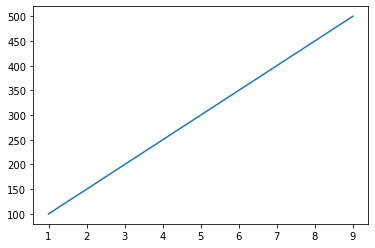

In [111]:
X = [1,3,5,7,9]
Y = [100,200,300,400,500]
plt.plot(X, Y)

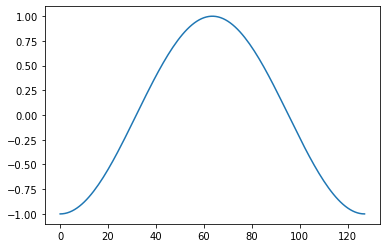

In [112]:
x = np.linspace(-np.pi, np.pi, 128)    # 연속적인 값을 갖는 배열
y = np.cos(x)                          # x에 대한 코사인 값
plt.plot(y)

<AxesSubplot:xlabel='Unnamed: 0'>

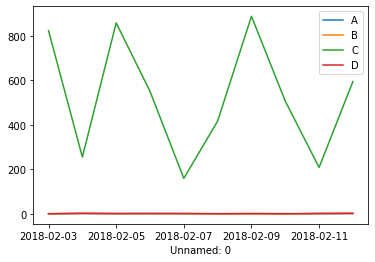

In [113]:
df.plot()

<AxesSubplot:xlabel='Unnamed: 0'>

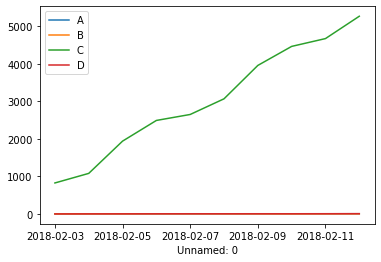

In [114]:
df = df.cumsum()    # 누적값을 바꾸기
df.plot()

In [115]:
import re

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)    # 문장 벡터화 진행

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))   # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


### 자카드 유사도
두 문장을 각각 단어의 집합으로 만든 뒤, 두 집합을 통해 유사도를 측정하는 방식 중 하나  
교집합인 단어 개수 / 전체 단어의 수  
0 ~ 1 사이의 값이 나올 것이고, 1에 가까울수록 유사도가 높다.

### 코사인 유사도
두 개의 벡터값에서 코사인 각도를 구하는 방법  
-1 ~ 1 사이의 값을 가지며, 1에 가까울수록 유사하다.  
유사도 계산시 가장 널리 쓰이는 방법 중 하나인데, 이는 다른 접근법에 비해 방향성의 개념이 더해져 성능이 좋기 때문이다.  
두 문장이 유사하다면 같은 방향으로 가리키고, 유사하지 않을수록 직교(90도)로 표현된다.

In [3]:
# TF-IDF로 벡터화한 문장을 사용하여 코사인 유사도 구해보기
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])    # 위에서 벡터화한 첫 번째와 두 번째 문장 비교

array([[0.17952266]])

문장 유사도는 0.179....

### 유클리디언 유사도
가장 기본적인 거리를 측정하는 유사도 공식  
유클리디언 거리 혹은 L2거리 - n차원 공간에서 두 점 사이의 최단 거리를 구하는 접근법

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

In [7]:
euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

다른 유사도 방식과 달리 단순히 거리를 구하기 때문에 값의 크기에 제한이 없다.  
이렇게 제한이 없는 유사도 값은 사용하기 어렵기 때문에 값을 제한해야 한다.  
값을 정규화한 후 다시 유클리디언 유사도를 측정하면 0 ~ 1사이의 값을 가진다.  
여기에서는 L1 정규화 방법을 사용(요소 값을 모두 더한 뒤 각 벡터의 값을 나눠줌)

In [8]:
import numpy as np
def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

In [9]:
tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

### 맨해튼 유사도
맨해튼 거리를 통해 유사도를 측정하는 방법  
맨해튼 거리: '사각형 격자'로 이뤄진 지도에서 출발점에서 도착점까지 갈 수 있는 최단거리를 구하는 공식(L1거리)  

In [10]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])    # 거리를 구하는 방법이므로 정규화한 값을 통해 유사도를 측정하였다.

array([[0.77865927]])

맨해튼 유사도일 경우가 가장 높게 나왔다.  
측정 방법에 따라 유사도가 크게 달라지므로 방향에 맞는 유사도 측정 방법을 골라야 한다.